# t-sne 觀察 : 流形還原

# [作業目標]
- 試著模仿範例寫法, 觀察 S 形使用 t-SNE , 在不同困惑度 (perplexity) 下的流形還原效果

# [作業重點]
- 使用 S 形資料集, 觀察 t-sne 在困惑度 (perplexity) 有所不同時, 流形還原的效果如何變化 (In[4], Out[4])
- Hint : ax.scatter(Y[red, 0], Y[red, 1], c="r") 與 ax.scatter(Y[green, 0], Y[green, 1], c="g") 兩行改一行 ax.scatter(Y[:, 0], Y[:, 1], c=color)

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

# 作業
* 將原始資料集換為S型圖, 觀察不同 perplexity 下的流形還原結果

S curve, perplexity = 30 in 2.6 sec
S curve, perplexity = 50 in 2.4 sec
S curve, perplexity = 80 in 2.4 sec
S curve, perplexity = 100 in 3.3 sec
S curve, perplexity = 150 in 2.6 sec
S curve, perplexity = 200 in 2.6 sec
S curve, perplexity = 250 in 2.7 sec
S curve, perplexity = 300 in 1.6 sec
S curve, perplexity = 350 in 1.6 sec


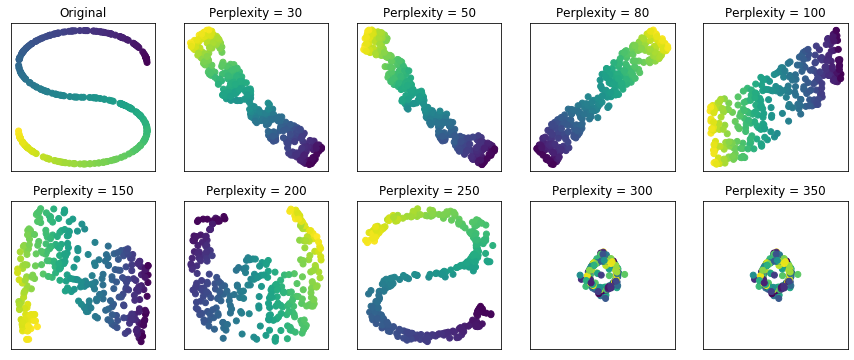

In [2]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2

# 設定資料點
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state = 0)
plt.figure(figsize = (15, 6))

# 繪製資料原圖
plt.subplot(2, 5, 1)
plt.title("Original")
plt.scatter(X[:, 0], X[:, 2], c = color)
plt.xticks(())
plt.yticks(())

# 繪製不同 perplexity 下的 t-SNE 流形還原圖 (請注意! 語法也要對應調整)
perplexities = [30, 50, 80, 100, 150, 200, 250, 300, 350]

for i, perplexity in enumerate(perplexities):        
    t0 = time()
    tsne = manifold.TSNE(n_components = n_components, init = 'random',
                         random_state = 0, perplexity = perplexity)
    
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S curve, perplexity = %d in %.2g sec" % (perplexity, t1 - t0))
    
    plt.subplot(2, 5, i + 2)
    plt.title("Perplexity = %d" % perplexity)
    plt.scatter(Y[:, 0], Y[:, 1], c = color)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')
    
plt.show()